<a href="https://colab.research.google.com/github/Oksana0020/DL-with-PyTorch/blob/main/Gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using of backward() and Gradients.

In [4]:
# Step 1: Imports
import torch
import matplotlib.pyplot as plt
import numpy as np

# Install dependencies if needed (run once in terminal/Jupyter)
!pip install torchviz graphviz

# Import after installation
from torchviz import make_dot  # For visualizing computation graphs

For x = 2.0, y = 9.0
Calculated gradient dy/dx at x = 2.0: 6.0


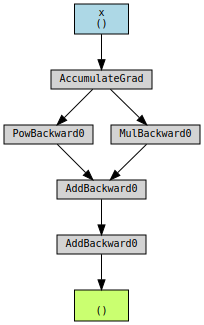

In [5]:
# Step 2: Calculating Gradients with .backward()

# Create a tensor and enable gradient tracking
x_calc = torch.tensor(2.0, requires_grad=True)

# Define a simple polynomial function
# y = x^2 + 2x + 1
y_calc = x_calc**2 + 2 * x_calc + 1

# Print values
print(f"For x = {x_calc.item()}, y = {y_calc.item()}")

# Compute gradients
# Since y is a scalar, we can call backward() directly
y_calc.backward()

# Gradient dy/dx is stored in x_calc.grad
print(f"Calculated gradient dy/dx at x = {x_calc.item()}: {x_calc.grad}")


# Optional: Visualize computation graph
dot = make_dot(y_calc, params={"x": x_calc})
dot

In [6]:
import torch

# Step 3.1: Zeroing Gradients with .grad.zero_()

x_manage = torch.tensor(3.0, requires_grad=True)

# 1) First calculation: y = x^2  -> dy/dx = 2x, at x=3 => 6
y1_manage = x_manage**2
y1_manage.backward()
print(f"Gradient after first backward pass (y=x^2, x=3): {x_manage.grad}")  # Expected: 6.0

# 2) Second calculation WITHOUT zeroing gradients:
# y = x^3 -> dy/dx = 3x^2, at x=3 => 27
# Gradients accumulate => 6 + 27 = 33
y2_manage = x_manage**3
y2_manage.backward()
print(f"Gradient after second backward pass (accumulated, y=x^3, x=3): {x_manage.grad}")  # Expected: 33.0

# 3) Zero the gradients before the next calculation
x_manage.grad.zero_()
print(f"Gradient after zeroing: {x_manage.grad}")  # Expected: 0.0

# 4) Third calculation AFTER zeroing gradients:
# y = 5x -> dy/dx = 5
y3_manage = x_manage * 5
y3_manage.backward()
print(f"Gradient after third backward pass (fresh, y=5x, x=3): {x_manage.grad}")  # Expected: 5.0


Gradient after first backward pass (y=x^2, x=3): 6.0
Gradient after second backward pass (accumulated, y=x^3, x=3): 33.0
Gradient after zeroing: 0.0
Gradient after third backward pass (fresh, y=5x, x=3): 5.0


In [7]:
import torch

# Step 3.2: Disabling Gradient Tracking with torch.no_grad()

# Create a tensor that tracks gradients
x_no_grad = torch.tensor(4.0, requires_grad=True)

print(f"x_no_grad: {x_no_grad}, requires_grad: {x_no_grad.requires_grad}")

# Operations inside torch.no_grad() context
with torch.no_grad():
    y_no_grad = x_no_grad**2 + 2 * x_no_grad + 1

    print("Inside torch.no_grad():")
    print(f"y_no_grad: {y_no_grad}, y_no_grad.requires_grad: {y_no_grad.requires_grad}")

# Since computation inside no_grad, no gradient is tracked
print(f"x_no_grad.grad after no_grad block: {x_no_grad.grad}")  # Expected: None

# Gradient tracking is re-enabled outside no_grad
z_with_grad = x_no_grad**3   # dy/dx = 3x^2, at x=4 => 48

print("\nOutside torch.no_grad():")
print(f"z_with_grad: {z_with_grad}, requires_grad: {z_with_grad.requires_grad}")

# Clear previous gradients (if any)
if x_no_grad.grad is not None:
    x_no_grad.grad.zero_()

# Backpropagation
z_with_grad.backward()

print(f"x_no_grad.grad after z_with_grad.backward(): {x_no_grad.grad}")  # Expected: 48.0


x_no_grad: 4.0, requires_grad: True
Inside torch.no_grad():
y_no_grad: 25.0, y_no_grad.requires_grad: False
x_no_grad.grad after no_grad block: None

Outside torch.no_grad():
z_with_grad: 64.0, requires_grad: True
x_no_grad.grad after z_with_grad.backward(): 48.0


Visualizing a Function to Optimize (3D Plot)

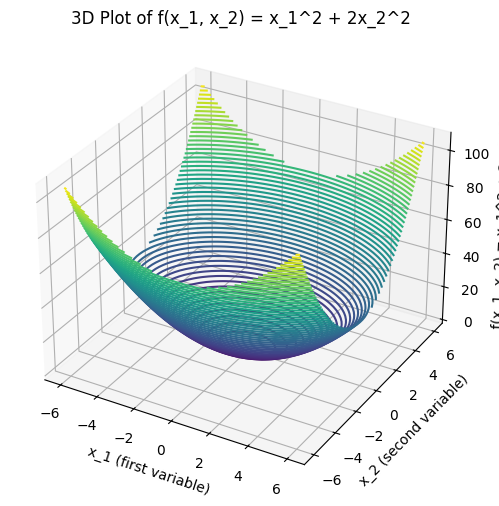

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Step 4.2: Visualizing a Function to Optimize (3D Plot)

# Define the function
def func_to_plot(x_coords, y_coords):
    return x_coords**2 + 2 * y_coords**2


# Define ranges for variables
x_range_plot = np.linspace(-6, 6, 50)
y_range_plot = np.linspace(-6, 6, 50)

# Create 2D grid
X_mesh, Y_mesh = np.meshgrid(x_range_plot, y_range_plot)

# Compute Z values
Z_values = func_to_plot(X_mesh, Y_mesh)

# Create figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Plot 3D surface
ax.contour3D(
    X_mesh,
    Y_mesh,
    Z_values,
    70,
    cmap="viridis"
)

# Labels and title
ax.set_xlabel("x_1 (first variable)")
ax.set_ylabel("x_2 (second variable)")
ax.set_zlabel("f(x_1, x_2) = x_1^2 + 2x_2^2")

ax.set_title("3D Plot of f(x_1, x_2) = x_1^2 + 2x_2^2")

# Show plot
plt.show()


In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_tensor_blocks(tensor_data, title="Tensor Visualization"):
    """
    Visualizes a tensor (0D to 3D) as blocks in 3D space.
    """

    # Convert to numpy
    if hasattr(tensor_data, "cpu"):
        tensor_np = tensor_data.cpu().numpy()
    else:
        tensor_np = np.array(tensor_data)

    ndim = tensor_np.ndim

    if ndim > 3:
        print(f"{ndim}D tensors not supported")
        return

    if ndim == 0 and tensor_np.size == 0:
        print("Cannot visualize empty tensor")
        return

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")

    colors = plt.cm.viridis(np.linspace(0, 1, tensor_np.size))

    if ndim == 0:
        ax.bar3d(0, 0, 0, 1, 1, 1, color=colors[0])

    elif ndim == 1:
        for i in range(len(tensor_np)):
            ax.bar3d(i, 0, 0, 1, 1, 1, color=colors[i])

        ax.set_xlim(-0.5, len(tensor_np) + 0.5)

    elif ndim == 2:
        rows, cols = tensor_np.shape

        for r in range(rows):
            for c in range(cols):
                ax.bar3d(c, r, 0, 1, 1, 1,
                         color=colors[r * cols + c],
                         edgecolor="k",
                         shade=True)

        ax.set_xlim(-0.5, cols + 0.5)
        ax.set_ylim(-0.5, rows + 0.5)
        ax.set_zlim(-0.5, 1.5)

    elif ndim == 3:
        depth, rows, cols = tensor_np.shape

        for d in range(depth):
            for r in range(rows):
                for c in range(cols):
                    ax.bar3d(c, r, d, 1, 1, 1,
                             color=colors[d * rows * cols + r * cols + c],
                             edgecolor="k",
                             shade=True)

        ax.set_xlim(-0.5, cols + 0.5)
        ax.set_ylim(-0.5, rows + 0.5)
        ax.set_zlim(-0.5, depth + 0.5)

    ax.set_title(f"{title}\nShape: {tensor_np.shape}", fontsize=10)
    plt.tight_layout()
    plt.show()


Scalar Tensor

Scalar Tensor:
tensor(7)
Value: 7
Shape: torch.Size([])
Dimensions: 0
Data type: torch.int64


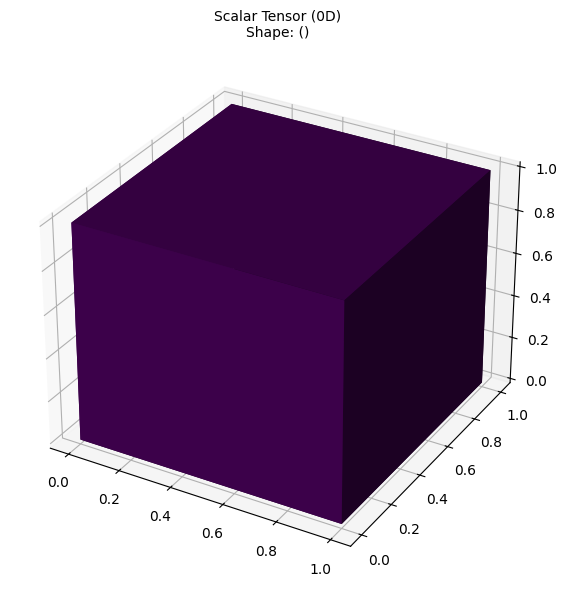

In [10]:
scalar_tensor = torch.tensor(7)

print("Scalar Tensor:")
print(scalar_tensor)
print(f"Value: {scalar_tensor.item()}")
print(f"Shape: {scalar_tensor.shape}")
print(f"Dimensions: {scalar_tensor.ndim}")
print(f"Data type: {scalar_tensor.dtype}")

plot_tensor_blocks(scalar_tensor, title="Scalar Tensor (0D)")


Vector tensor 1D


Vector Tensor:
tensor([1, 2, 3])
Shape: torch.Size([3])
Dimensions: 1
Data type: torch.int64


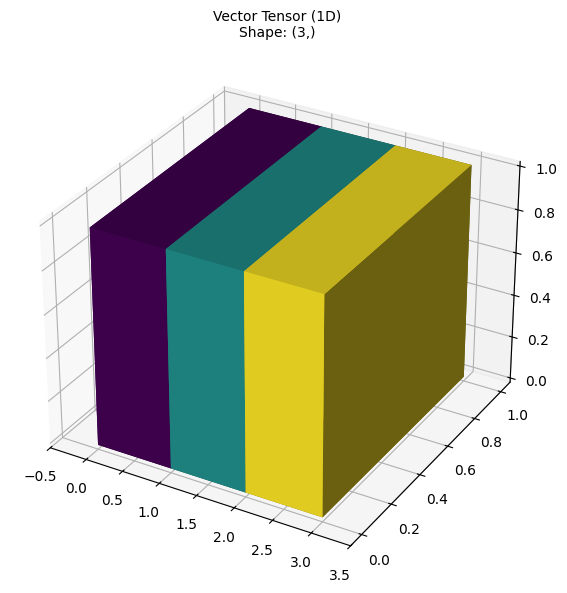

In [11]:
vector_tensor = torch.tensor([1, 2, 3])

print("\nVector Tensor:")
print(vector_tensor)
print(f"Shape: {vector_tensor.shape}")
print(f"Dimensions: {vector_tensor.ndim}")
print(f"Data type: {vector_tensor.dtype}")

plot_tensor_blocks(vector_tensor, title="Vector Tensor (1D)")


Zero tensor

In [12]:
zeros_tensor = torch.zeros(2, 3)

print("\nZeros Tensor (2x3):")
print(zeros_tensor)
print(f"Shape: {zeros_tensor.shape}")
print(f"Data type: {zeros_tensor.dtype}")



Zeros Tensor (2x3):
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Shape: torch.Size([2, 3])
Data type: torch.float32


Ones tensor

In [13]:
ones_tensor_float = torch.ones(3, 2)

print("\nOnes Tensor (float):")
print(ones_tensor_float)
print(f"Shape: {ones_tensor_float.shape}")
print(f"Data type: {ones_tensor_float.dtype}")



Ones Tensor (float):
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
Shape: torch.Size([3, 2])
Data type: torch.float32


In [14]:
ones_tensor_int = torch.ones(2, 2, dtype=torch.int32)

print("\nOnes Tensor (int32):")
print(ones_tensor_int)
print(f"Shape: {ones_tensor_int.shape}")
print(f"Data type: {ones_tensor_int.dtype}")



Ones Tensor (int32):
tensor([[1, 1],
        [1, 1]], dtype=torch.int32)
Shape: torch.Size([2, 2])
Data type: torch.int32


random tensor

In [15]:
random_tensor_uniform = torch.rand(2, 3)

print("\nRandom Tensor (uniform):")
print(random_tensor_uniform)
print(f"Shape: {random_tensor_uniform.shape}")
print(f"Data type: {random_tensor_uniform.dtype}")



Random Tensor (uniform):
tensor([[0.0150, 0.4317, 0.7250],
        [0.1040, 0.5138, 0.5076]])
Shape: torch.Size([2, 3])
Data type: torch.float32


In [16]:
random_tensor_normal = torch.randn(2, 3)

print("\nRandom Tensor (normal):")
print(random_tensor_normal)
print(f"Shape: {random_tensor_normal.shape}")
print(f"Data type: {random_tensor_normal.dtype}")



Random Tensor (normal):
tensor([[ 1.2967,  1.1965,  0.1566],
        [-0.2532,  1.0127, -0.7870]])
Shape: torch.Size([2, 3])
Data type: torch.float32


Matrix attributes recap

In [17]:
matrix_tensor = torch.tensor([[1, 2], [3, 4]])

print("\nRecap on matrix tensor:")
print(f"Content:\n{matrix_tensor}")
print(f"Shape: {matrix_tensor.shape}")
print(f"Dimensions: {matrix_tensor.ndim}")
print(f"Data type: {matrix_tensor.dtype}")

print(f"\nValue from scalar tensor: {scalar_tensor.item()}")



Recap on matrix tensor:
Content:
tensor([[1, 2],
        [3, 4]])
Shape: torch.Size([2, 2])
Dimensions: 2
Data type: torch.int64

Value from scalar tensor: 7


Using .backward() and Gradients

In [18]:
x_calc = torch.tensor(2.0, requires_grad=True)

y_calc = x_calc**2 + 2*x_calc + 1

print(f"x = {x_calc.item()}, y = {y_calc.item()}")

y_calc.backward()

print(f"Gradient dy/dx = {x_calc.grad}")


x = 2.0, y = 9.0
Gradient dy/dx = 6.0


Zeroing Gradients

In [19]:
x_manage = torch.tensor(3.0, requires_grad=True)

# First
y1 = x_manage**2
y1.backward()
print("After first backward:", x_manage.grad)

# Second
y2 = x_manage**3
y2.backward()
print("After second backward:", x_manage.grad)

# Reset
x_manage.grad.zero_()
print("After zeroing:", x_manage.grad)

# Third
y3 = x_manage * 5
y3.backward()
print("After third backward:", x_manage.grad)


After first backward: tensor(6.)
After second backward: tensor(33.)
After zeroing: tensor(0.)
After third backward: tensor(5.)


torch.no_grad() Example

In [20]:
x_no_grad = torch.tensor(4.0, requires_grad=True)

with torch.no_grad():
    y_no_grad = x_no_grad**2 + 1
    print("Inside no_grad:", y_no_grad)

print("Grad after no_grad:", x_no_grad.grad)

z = x_no_grad**3
z.backward()

print("After backward:", x_no_grad.grad)


Inside no_grad: tensor(17.)
Grad after no_grad: None
After backward: tensor(48.)


3D Function Visualization

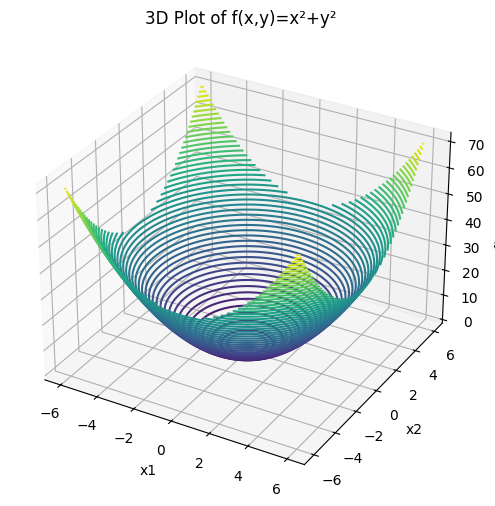

In [21]:
def func_to_plot(x, y):
    return x**2 + y**2


x_range = np.linspace(-6, 6, 50)
y_range = np.linspace(-6, 6, 50)

X, Y = np.meshgrid(x_range, y_range)
Z = func_to_plot(X, Y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.contour3D(X, Y, Z, 70, cmap="viridis")

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1,x2)")
ax.set_title("3D Plot of f(x,y)=x²+y²")

plt.show()


Learning Rule Simulation (Gradient Descent)

In [22]:
weight = torch.tensor(2.0, requires_grad=True)
target = torch.tensor(10.0)

learning_rate = 0.01
iterations = 50

losses = []

for i in range(iterations):

    # Forward
    output = weight**4

    # Loss
    loss = (output - target)**2
    losses.append(loss.item())

    # Backward
    loss.backward()

    # Update
    with torch.no_grad():
        weight -= learning_rate * weight.grad

    # Reset gradients
    weight.grad.zero_()

    if i % 10 == 0:
        print(f"Iter {i+1}: weight={weight.item():.4f}, loss={loss.item():.4f}")


print("\nFinal weight:", weight.item())
print("Target:", target.item())


Iter 1: weight=-1.8400, loss=36.0000
Iter 11: weight=nan, loss=nan
Iter 21: weight=nan, loss=nan
Iter 31: weight=nan, loss=nan
Iter 41: weight=nan, loss=nan

Final weight: nan
Target: 10.0


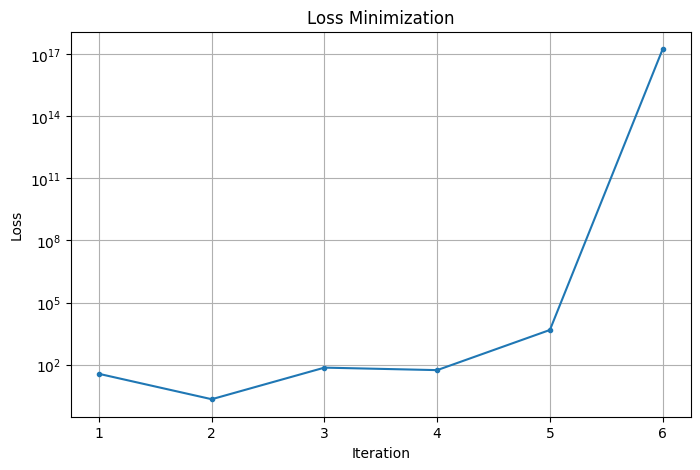

In [23]:
# Plot loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, iterations+1), losses, marker='.')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Minimization")
plt.grid(True)
plt.yscale("log")
plt.show()
